In [1]:
from nnlearn.Network import *


In [2]:
class generator_network():
    def __init__(self, generator_layers, discriminator_layers):
        
        full_network = network(generator_layers + discriminator_layers, loss_function = cross_entropy_loss)



In [3]:
#layer structure for generator
generator_layers = [
    input_layer(size = 2),
    
    connected_layer(num_neurons = 10, prev_neurons = 2),
    leaky_relu_activation_layer(10),
    
    connected_layer(num_neurons = 10, prev_neurons = 10),
    leaky_relu_activation_layer(10),
    
    connected_layer(num_neurons = 2, prev_neurons = 10)
    
]

#layer structure for discriminator
discriminator_layers = [
    input_layer(size = 2),
    
    connected_layer(num_neurons = 10, prev_neurons = 2),
    leaky_relu_activation_layer(10),
    
    connected_layer(num_neurons = 10, prev_neurons = 10),
    leaky_relu_activation_layer(10),
    
    connected_layer(num_neurons = 1, prev_neurons = 10),
    sigmoid_activation_layer(1)
    
]


generator = generator_network(generator_layers, discriminator_layers)

In [356]:
dim = generator.input_size

def generate():
    sample = np.random.normal(size = dim)
    sample = generator.predict(sample)
    return sample[0]

def generate_sample(n):
    return np.array([[generate()] for _ in range(n)])

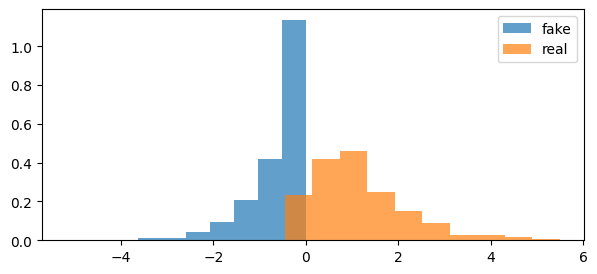

In [357]:
num = 1000
real_samples = np.random.chisquare(5, size = num).reshape(-1,1)/3 - .5

fake_samples = np.array([generate() for _ in range(num)])

plt.figure(figsize = (7,3))

plt.hist(fake_samples, density = True, alpha = .7, label = "fake")
plt.hist(real_samples, density = True, alpha = .7, label = "real")

plt.legend()
plt.show()


In [358]:
x = np.concatenate([fake_samples.reshape(-1,1), real_samples.reshape(-1,1)])
y = np.concatenate([np.repeat(1, len(fake_samples)), np.repeat(0, len(real_samples))]).reshape(-1,1)

print(x.shape, y.shape)

(2000, 1) (2000, 1)


In [359]:
discriminator.minibatch_fit(x, y, batch_size = 10, epochs = 10_000)

--------------------
epoch: 1 
 loss: 0.6474
--------------------
epoch: 2001 
 loss: 0.1378
--------------------
epoch: 4001 
 loss: 0.1418
--------------------
epoch: 6001 
 loss: 0.1369
--------------------
epoch: 8001 
 loss: 0.1358
--------------------
epoch: 10000 
 loss: 0.1376


In [360]:
discriminator.loss(x,y)

0.1376030690853584

In [209]:
batch_size = 20

for _ in range(1_000):
    fake_sample = generate_sample(len(real_samples))
    fake_target = np.repeat(1, len(fake_sample))

    x = np.concatenate([fake_sample.reshape(-1,1), real_samples.reshape(-1,1)])
    y = np.concatenate([np.repeat(1, len(fake_sample)), np.repeat(0, len(real_samples))]).reshape(-1,1)

    # print(x, y)


    # break
    
    batch_indices = sample(range(len(x)), batch_size)

    for i, s in enumerate(batch_indices):
        discriminator.forward(x[s].reshape(-1,1))
        discriminator.backward(y[s].reshape(-1,1), learn_coef = .05)



    for layer in discriminator.layers: 
        if type(layer) == connected_layer:
            layer.weight_mat = layer.weight_mat + (layer.weight_mat_update / batch_size)
            layer.bias_mat = layer.bias_mat + (layer.bias_mat_update / batch_size)


    discriminator.reset_update_mats()

    
    


In [210]:
discriminator.loss(x,y)



0.38140837218864065

In [361]:
batch_size = 20
discriminator.reset_update_mats()
generator.reset_update_mats()

for _ in range(100):
    latent_sample = np.random.normal(size = (len(real_samples), 1))
    fake_target = np.repeat(1, len(latent_sample))

    x = latent_sample.reshape(-1,1)
    y = fake_target.reshape(-1,1)

    # print(x, y)

    # plt.hist([generator.predict(s)[0,0] for s in x], density = True, alpha = .7, label = "fake")
    # plt.hist(real_samples, density = True, alpha = .7, label = "real")

    
    batch_indices = sample(range(len(x)), batch_size)

    for i, s in enumerate(batch_indices):
        fake_sample = generator.predict(x[s].reshape(-1,1))
        discriminator_prediction = discriminator.predict(fake_sample.reshape(-1,1))

        generator.backward(y = np.array([[0]]), prediction = discriminator_prediction)

        # print(" fake sample:", fake_sample)
        # print("discrim pred:", discriminator_prediction)
        # print("    gradient:", generator.loss_function.gradient(target = np.array([[0.5]]), prediction = discriminator_prediction))
        

        # break

        

    # break

    for layer in generator.layers: 
        if type(layer) == connected_layer:
            layer.weight_mat = layer.weight_mat + (layer.weight_mat_update / batch_size)
            layer.bias_mat = layer.bias_mat + (layer.bias_mat_update / batch_size)



    generator.reset_update_mats()


    
    # break


    

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/nnlearn/Layers.py:31: RuntimeWarning: overflow encountered in matmul
  self.out = self.weight_mat @ activations + self.bias_mat
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/nnlearn/Layers.py:31: RuntimeWarning: invalid value encountered in matmul
  self.out = self.weight_mat @ activations + self.bias_mat


In [344]:
discriminator.loss(x,y)


1.4109868424914191

ValueError: autodetected range of [nan, nan] is not finite

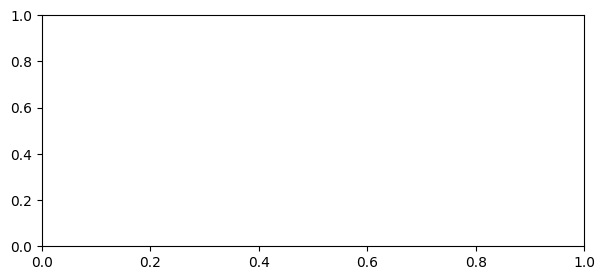

In [345]:
num = 1000
real_samples = np.random.chisquare(5, size = num).reshape(-1,1)/3 - .5

fake_samples = np.array([generate() for _ in range(num)])

plt.figure(figsize = (7,3))

plt.hist(fake_samples, density = True, alpha = .7, label = "fake")
plt.hist(real_samples, density = True, alpha = .7, label = "real")

plt.legend()
plt.show()

In [351]:
generator.layers[3].weight_mat

array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]])